In [1]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import requests

from api_keys import TMDB_KEY

In [2]:
url = "https://api.themoviedb.org/3/discover/movie?include_adult=false&include_video=false&language=en-US&page=1&sort_by=popularity.desc"
headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {TMDB_KEY}"
}

response = requests.get(url, headers=headers)

In [3]:
json_response = json.loads(response.text)
print(json.dumps(json_response, indent=4))

{
    "page": 1,
    "results": [
        {
            "adult": false,
            "backdrop_path": "/a3VFDThApTb4lpHfGJQ0oYnJdz8.jpg",
            "genre_ids": [
                53,
                28
            ],
            "id": 1151470,
            "original_language": "en",
            "original_title": "The Vigilante",
            "overview": "Returning from Afghanistan, Jessica, a Spec OPS Marine, finds herself in a war she never imagined and discovers middle America suburbia has changed when her thirteen year old sister, Aimee, is abducted by sex traffickers.",
            "popularity": 1133.3775,
            "poster_path": "/pWuGTUPJfxqJffRxvAYNNvI2SRx.jpg",
            "release_date": "2023-09-08",
            "title": "The Vigilante",
            "video": false,
            "vote_average": 5.154,
            "vote_count": 13
        },
        {
            "adult": false,
            "backdrop_path": "/qfAfE5auxsuxhxPpnETRAyTP5ff.jpg",
            "genre_ids": [
       

In [4]:
movies = json_response["results"]
movies_with_posters = [movie for movie in movies if movie["poster_path"]]

for movie in movies_with_posters:
    print(f"{movie["title"]} - poster_path: {movie["poster_path"]}")

The Vigilante - poster_path: /pWuGTUPJfxqJffRxvAYNNvI2SRx.jpg
Captain America: Brave New World - poster_path: /pzIddUEMWhWzfvLI3TwxUG2wGoi.jpg
Z Zone - poster_path: /s6kFtdxfTC4xR8yDGbIjTgGEcFI.jpg
Batman Ninja vs. Yakuza League - poster_path: /2HiTUdSCKQUW7FhupW53ZE6KSwB.jpg
Snow White - poster_path: /xWWg47tTfparvjK0WJNX4xL8lW2.jpg
Moana 2 - poster_path: /aLVkiINlIeCkcZIzb7XHzPYgO6L.jpg
The Electric State - poster_path: /jRdxyW5ZmhD3ycStlb7gwOewTuE.jpg
Old Guy - poster_path: /ulVVfNY8bmy1RbHfY4zi3fOwGzh.jpg
Counterattack - poster_path: /lI2uFlSEkwXKljqiry7coaJ6wIS.jpg
The Gorge - poster_path: /7iMBZzVZtG0oBug4TfqDb9ZxAOa.jpg
Revelations - poster_path: /ak0HlRVsVzh8mvwIUZpZr0z6uqW.jpg
Flight Risk - poster_path: /q0bCG4NX32iIEsRFZqRtuvzNCyZ.jpg
Hellhound - poster_path: /h1BtcTEk0pbe9XhbxrAp2oLKoWb.jpg
Mufasa: The Lion King - poster_path: /lurEK87kukWNaHd0zYnsi3yzJrs.jpg
Sky Force - poster_path: /f1KLUpaW7rbXhUm5SxG1lpPFFCJ.jpg
Demon City - poster_path: /g5PqsFFrayyRL1Ldgib2lMYuJXg.jpg


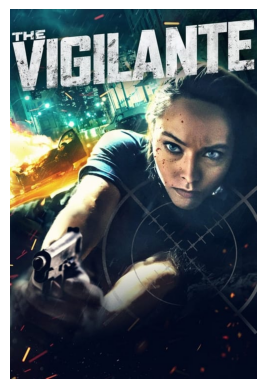

In [5]:
poster_base_url = "https://image.tmdb.org/t/p/w500"
poster_path = movies_with_posters[0]["poster_path"]
poster_url = poster_base_url + poster_path

# Fetch the image from the poster URL
poster_response = requests.get(poster_url)
img_array = np.asarray(bytearray(poster_response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)
plt.show()

In [6]:
def get_movie_posters(movies_with_posters):
    poster_base_url = "https://image.tmdb.org/t/p/w500"

    posters = []
    for movie in movies_with_posters:
        poster_path = movie["poster_path"]
        poster_url = poster_base_url + poster_path
        poster_response = requests.get(poster_url)
        img_array = np.asarray(bytearray(poster_response.content), dtype=np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        posters.append(img)

    return posters

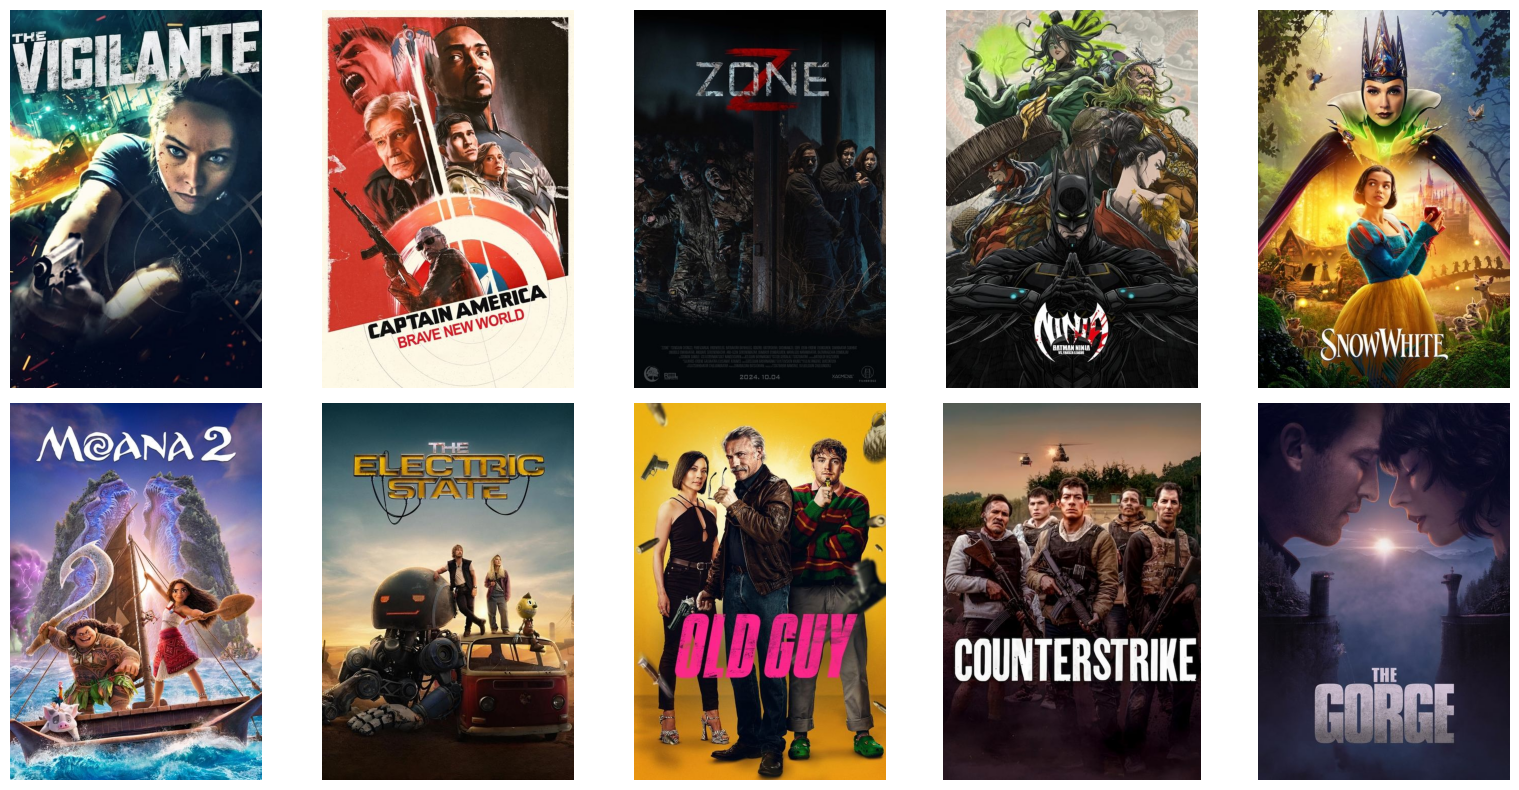

In [7]:
posters = get_movie_posters(movies_with_posters[0:10])

fig, axs = plt.subplots(2, 5, figsize=(16, 8))
axs = axs.flatten()
for i, poster in enumerate(posters):
    axs[i].imshow(poster)
    axs[i].axis("off")
plt.tight_layout()
plt.show()